In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import data

In [2]:
data_train = '../input/fashion-mnist_train.csv'
data_test = '../input/fashion-mnist_test.csv'

train_df = pd.read_csv(data_train)
test_df = pd.read_csv(data_test)

## Preprocess data

In [3]:
def get_features_labels(df):
    features = df.values[:, 1:]/255
    labels = df['label'].values
    return features, labels

In [4]:
train_features, train_labels = get_features_labels(train_df)
test_features, test_labels = get_features_labels(test_df)

In [5]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Show image

In [6]:
def show_image(data):
    plt.figure()
    _ = plt.imshow(np.reshape(data, (28, 28)), 'gray')

# Train Model

In [7]:
EPOCHS = 10
BATCH_SIZE = 128
NUM_CLASSES = 10

In [8]:
def train_model(model):
    history = model.fit(train_features, train_labels, 
                        batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, 
                        validation_data=(test_features, test_labels))
    score = model.evaluate(test_features, test_labels, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

# Single Layer with one unit

In [9]:
model0 = tf.keras.Sequential()
model0.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, input_shape = (784,)))
model0.add(tf.keras.layers.Dense(NUM_CLASSES, activation=tf.nn.softmax))
model0.summary()

model0.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_model(model0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/sample - loss: 2.2933 - accuracy: 0.1003 - val_loss: 2.2649 - val_accuracy: 0.1072
Epoch 2/10
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2465 - accuracy: 0.1499 - val_loss: 2.2283 - val_accuracy: 0.1714
Epoch 3/10
60000/60000 [==============================] - 1s 18us/sample - loss: 2.2132 - accuracy: 0.1833 - val_loss: 2.1976 - val_accuracy: 0.1872
Epoch 4/10
60000/60000 

# Predction - Single Layer

In [11]:
np.set_printoptions(suppress=True)

In [51]:
x_test = test_features.reshape(10000, 28, 28)


def prediction_result(index, local_model):
    classes  = ['T-shirt' , 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    #get picture 
    plt.figure(figsize=(6,3))
    plt.figure()
    plt.imshow(x_test[index])
    plt.grid(False)
    
    #create numpy array from selected image
    img = np.array(x_test[index])

    #add the image to batch as only member of it. for predicting it
    img = (np.expand_dims(img,0))
    img = img.reshape(1,784)
    #make predicion of the image
    predictions_single = local_model.predict(img)
    # print("single prediction",predictions_single)
    #print(predictions_single[0])
    pos = get_position(predictions_single)
    plt.text(0, 0, classes[pos[0]], bbox=dict(fill=True, edgecolor='red', linewidth=0))
    plt.show()

    
def get_position(array):
    result = np.where(array == np.amax(array[0]))
    return  result[1]

# prediction_result(9, model0)

def test(model):
    m = np.random.randint(5000, size=5)
    for x in m:
        prediction_result(x, model)


<Figure size 432x216 with 0 Axes>

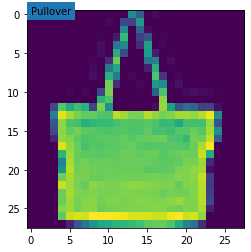

<Figure size 432x216 with 0 Axes>

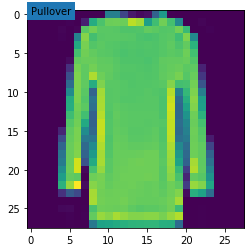

<Figure size 432x216 with 0 Axes>

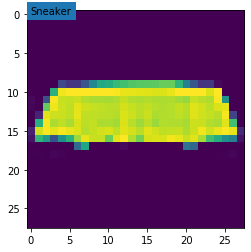

<Figure size 432x216 with 0 Axes>

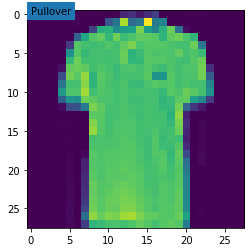

<Figure size 432x216 with 0 Axes>

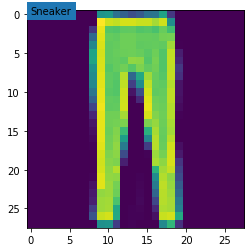

In [52]:
test(model0)

## Results

### Documentation

Test loss: 1.8672341890335082

Test accuracy: 0.2349

### My result: 


Test loss: 2.2532056991577147

Test accuracy: 0.1344
    

# Improved Multilayer

In [14]:
model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape = (784,)))
model3.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model3.add(tf.keras.layers.Dense(NUM_CLASSES, activation=tf.nn.softmax))

model3.summary()
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
train_model(model3)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.5453 - accuracy: 0.8017 - val_loss: 0.4647 - val_accuracy: 0.8245
Epoch 2/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3812 - accuracy: 0.8596 - val_loss: 0.3502 - val_accuracy: 0.8748
Epoch 3/10
60000/60000 [======

# Prediction multilayer

<Figure size 432x216 with 0 Axes>

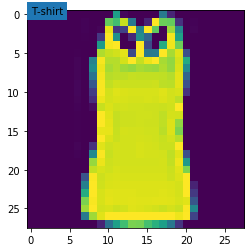

<Figure size 432x216 with 0 Axes>

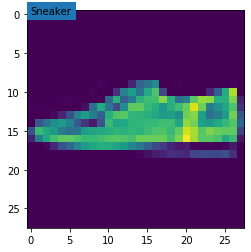

<Figure size 432x216 with 0 Axes>

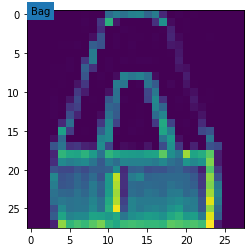

<Figure size 432x216 with 0 Axes>

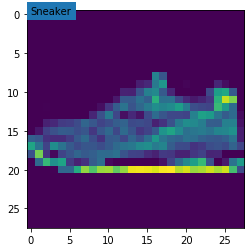

<Figure size 432x216 with 0 Axes>

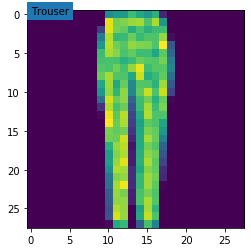

In [55]:
test(model3)

# Result: 

Test loss: 0.3887981383562088

Test accuracy: 0.8605

# Multi-layer with dropout

In [38]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(512, activation='relu'))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'))
model4.summary()
model4.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
train_model(model4)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30u

# Predict

In [ ]:
np.set_printoptions(threshold=np.inf)

In [ ]:
predicted_classes = model4.predict_classes(test_features)

In [ ]:
predicted_classes

<Figure size 432x216 with 0 Axes>

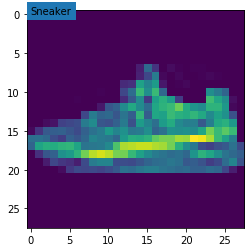

<Figure size 432x216 with 0 Axes>

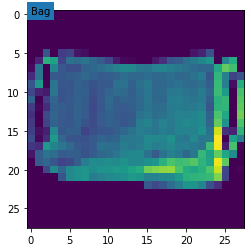

<Figure size 432x216 with 0 Axes>

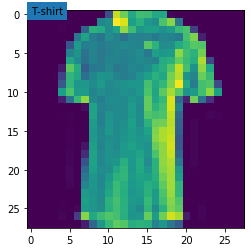

<Figure size 432x216 with 0 Axes>

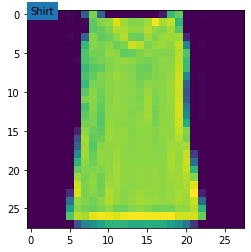

<Figure size 432x216 with 0 Axes>

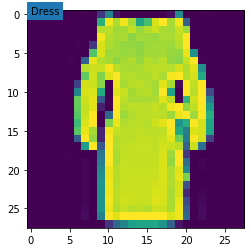

In [56]:
test(model4)